# U-spline Tutorial in Jupyter using the Julia language

## Review of the Bernstein basis

The Bernstein basis functions are a set of basis functions that span the polynomial space. Just as the basis

$$
x^i \text{, }i\in{0...p}
$$

span the polynomial space of degree $p$, the Bernstein basis functions of degree $p$ also span the same space.

In general, the $i$-th Bernstein basis function of degree $p$ is defined as

$$
B_{i,p}(t) = \binom{p}{i} t^i (1-t)^{p-i}
$$

However, to provide some reasoning behind this definition, the following motivation for the construction of the Bernstein basis is helpful.

We may begin with the idea that these functions form a partition of unity, which means the sum of the functions equals 1.

$$
\sum_i f_i = 1
$$

The simplest set of functions that has partition of unity is the function $f(t)=1$.
If we wanted to introduce some variation as a function of $t$, we must ensure that no matter what value $t$ has, the total sum still equals $1$.  One way to do this is

$$
(1-t)+t
$$

If we raise this expression to a power of $p$, the property of partition of unity continues to be true. Thus we have

$$
((1-t)+t)^p
$$

Now, suppose we expand this expression for a given value of $p$.  If $p=0$, we have

$$
1
$$

If $p=1$ we have

$$
(1-t)+t
$$

If $p=2$ we have

$$
(1 - t)^2 + 2 (1 - t) t + t^2
$$

If $p=3$ we have

$$
(1 - t)^3 + 3 (1 - t)^2 t + 3 (1 - t) t^2 + t^3
$$

For a given value of $p$, the $i$-th Bernstein basis function is the $i$-th term in these expanded expressions.
Thus, for $p=3$, the Bernstein basis functions are

$$
(1 - t)^3
$$

$$
3 (1 - t)^2 t
$$

$$
3 (1 - t) t^2
$$

$$
t^3
$$



# Plotting the Bernstein basis

What do these Bernstein functions look like? We can plot them using Julia.

First, we can build the Bernstein basis of degree $p$ using some symbolic manipulation using the library SymPy.  Note: A great simple example of using SymPy can be found here: https://nbviewer.jupyter.org/github/sylvaticus/juliatutorial/blob/master/assets/Symbolic%20computation.ipynb

In [61]:
using SymPy

a,b,t = symbols("a,b,t", real=true)
p = 2
expr1 = (a+b)^p

       2
(a + b) 

In [62]:
expr2 = SymPy.expand(expr1)

 2            2
a  + 2⋅a⋅b + b 

In [63]:
expr3 = subs(expr2, a=>(1-t), b=>t)

 2                        2
t  + 2⋅t⋅(1 - t) + (1 - t) 

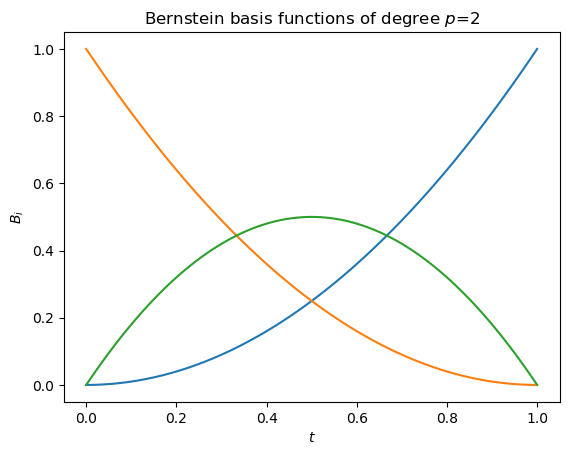

PyObject Text(26.400000000000013, 0.5, '$B_i$')

In [64]:
using PyPlot
plt = PyPlot

# Grab each term in the expression
B = Array{Any,1}()
for j = 1:(p+1)
    push!( B, expr3.args[j] )
end

# Evaluate each term at all the points in 'x', going from 0 to 1
h = 0.01
x = collect(0:h:1)[:]
BEvals = zeros(p+1,length(x))
for i = 1:length(x)
    for j = 1:(p+1)
        BEvals[j,i] = subs(B[j], t=>x[i]).evalf()
    end
end

# Plot each function from 0 to 1
plt.figure()
for j = 1:(p+1)
    plt.plot(x,BEvals[j,:])
end

plt.title("Bernstein basis functions of degree \$p\$="*string(p))
plt.xlabel("\$t\$")
plt.ylabel("\$B_i\$")

More efficiently, a function that evaluates the $a$-th Bernstein basis of degree $p$ may be defined as follows.

In [65]:
"""
function bernstein_basis(a::Int64,
                        p::Int64,
                        t::Float64;
                        dmin::Float64=0.,
                        dmax::Float64=1.)
============================
# Parameters
* a: The function index
* p: The polynomial degree
* t: The parameter value where the basis function is to be evaluated

# Named Parameters
* dmin: The minimum value of the domain
* dmax: The maximum value of the domain
"""
function bernstein_basis(a::Int64,
                        p::Int64,
                        t::Union{Float64,ComplexF64};
                        dmin::Float64=0.,
                        dmax::Float64=1.)::Float64
    if(a < 1 || a > p+1 || real(t) < dmin || real(t) > dmax)
        return 0.0
    end
    tmapped = (t - dmin)/(dmax-dmin)
    result = binomial(p,a-1) * tmapped^(a-1) * (1.0-tmapped)^(p-(a-1))
    return result
end

bernstein_basis

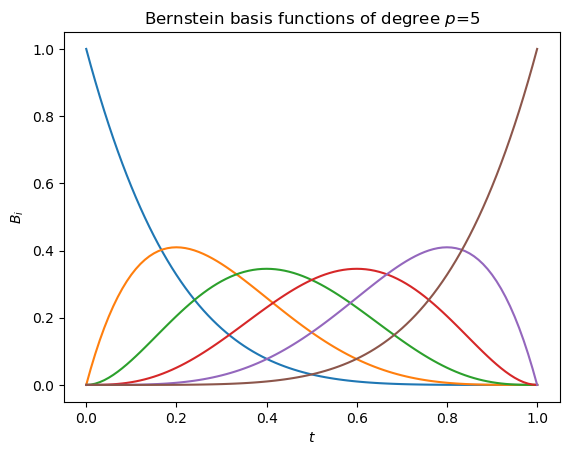

PyObject Text(26.400000000000013, 0.5, '$B_i$')

In [66]:
# Evaluate each term at all the points in 'x', going from 0 to 1
h = 0.01
p = 5
x = collect(0:h:1)[:]
BEvals = zeros(p+1,length(x))
for i = 1:length(x)
    for j = 1:(p+1)
        BEvals[j,i] = bernstein_basis(j,p,x[i])
    end
end

# Plot each function from 0 to 1
plt.figure()
for j = 1:(p+1)
    plt.plot(x,BEvals[j,:])
end
plt.title("Bernstein basis functions of degree \$p\$="*string(p))
plt.xlabel("\$t\$")
plt.ylabel("\$B_i\$")

# Bezier Curves

A Bezier curve is a polynomial curve drawn in (typically) 2D or 3D space, by summing the product of a set of coefficients in spatial coordinates with the set of Bernstein bases.  These coefficients are called *control points*.

$$
\boldsymbol{X}(t) = \sum_i \boldsymbol{P_i} B_i(t)
$$

where the control point $\boldsymbol{P_i}$ is two or three dimensional vector specifying a point in space.

For example, suppose we wanted to draw a cubic Bezier curve on a 2D plane.  We may select the following points:

$$
\boldsymbol{P_1} = \begin{bmatrix}
           0.0 \\
           0.0 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P_2} = \begin{bmatrix}
           1.0 \\
           0.5 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P_3} = \begin{bmatrix}
           0.5 \\
           1.5 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P_4} = \begin{bmatrix}
           2.0 \\
           2.0 \\
         \end{bmatrix}
$$

Then, we draw the curve by evaluating the following equation

$$
\boldsymbol{X}(t) = \boldsymbol{P_1} B_1(t) + \boldsymbol{P_2} B_2(t)  + \boldsymbol{P_3} B_3(t)  + \boldsymbol{P_4} B_4(t) 
$$

In Julia, we can draw it this way:

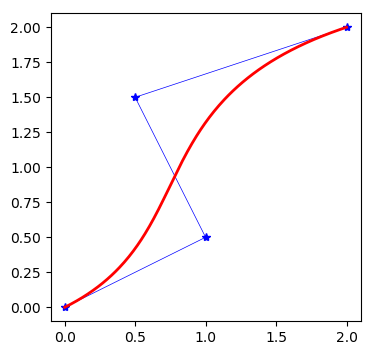

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc21854e550>

In [67]:
using PyPlot
plt = PyPlot

# Cubic bezier curve
p = 3

# The spatial dimension
dim_s = 2

# The control points
P = Array{Float64,2}([
        0.0 1.0 0.5 2.0
        0.0 0.5 1.5 2.0 ])

# Compute the curve position at each value of t.
h = 0.005
t = collect(0:h:1)[:]
X = zeros(dim_s,length(t))
for i = 1:length(t)
    for d = 1:dim_s
        X[d,i] = 0.0
        for k = 1:(p+1)
            X[d,i] += P[d,k] * bernstein_basis(k,p,t[i])
        end
    end
end

# Draw the curve
figure_size = (4, 4)
plt.figure(figsize=figure_size)
plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)


The control points are in blue, and the Bezier curve is in red.  The thin lines between the control points is sometimes referred to as the *control mesh*.